In [1]:
# Data Preprocessing Mayorov Igor

In [2]:
# Загружаем необходимы библиотеки для работы с датасетом.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Импортируем собственно наш датасет.
df = pd.read_csv('DataFlats2.csv', sep=',')

In [4]:
# Смотрим что было загружено. 
df

,totsp,livesp,kitsp,dist,metrdist,floor,price
0,58,40,6.0,12.5,7,10,0
1,44,28,6.0,13.5,7,2,0
2,70,42,6.0,14.5,3,7,0
3,61,37,6.0,13.5,7,12,0
4,104,60,11.0,10.5,7,15,1
...,...,...,...,...,...,...,...
2035,77,45,10.0,12.0,5,1,0
2036,60,43,6.0,9.0,5,1,0
2037,60,46,5.0,10.5,5,1,0
2038,76,48,10.0,12.5,5,1,0


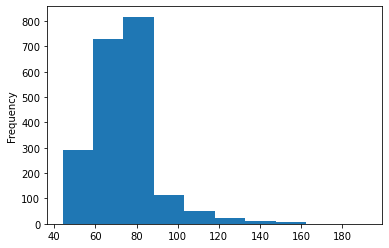

In [5]:
#Построим гистограммы по числовым переменным для того что определить нужно ли логарифмировать данные для лучшего исследоания. Как видим ниже из графиков данные лучше всего будет пролагорифмировать.
df['totsp'].plot(kind = 'hist')

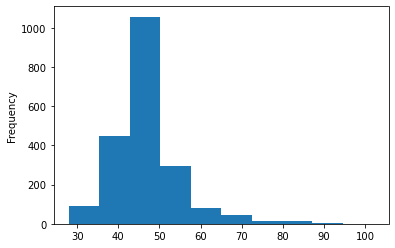

In [6]:
df['livesp'].plot(kind = 'hist')

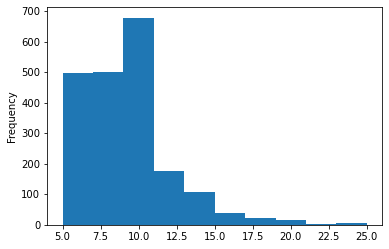

In [7]:
df['kitsp'].plot(kind = 'hist')

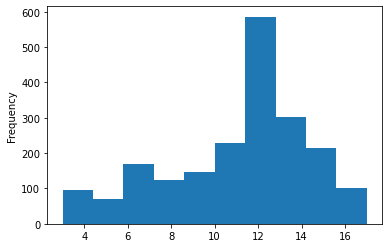

In [8]:
df['dist'].plot(kind = 'hist')

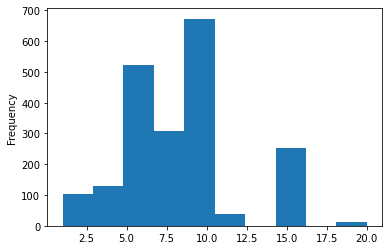

In [9]:
df['metrdist'].plot(kind = 'hist')

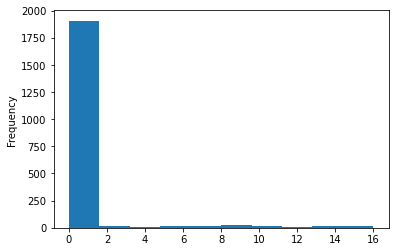

In [10]:
df['floor'].plot(kind = 'hist')

In [11]:
#Логарифмируем данные для более точного построения. 
df_1 = df.copy()
df_1[['totsp', 'livesp','kitsp', 'metrdist',]] = np.log(df_1[['totsp', 'livesp','kitsp', 'metrdist']])
df=df_1.copy()

In [13]:
#Смотрим статистику нашего датасета. 
df.describe()

,totsp,livesp,kitsp,dist,metrdist,floor,price
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,4.272799,3.823105,2.142483,11.015686,1.959187,1.326471,0.212255
std,0.189372,0.156431,0.289290,3.375539,0.565820,2.323365,0.409005
min,3.784190,3.332205,1.609438,3.000000,0.000000,0.000000,0.000000
25%,4.127134,3.737670,1.945910,9.000000,1.609438,1.000000,0.000000
50%,4.297262,3.806662,2.197225,12.000000,1.945910,1.000000,0.000000
75%,4.369448,3.912023,2.302585,13.500000,2.302585,1.000000,0.000000
max,5.257495,4.624973,3.218876,17.000000,2.995732,16.000000,1.000000


In [14]:
# Шкалируем наши переменные для упрощения интерпритации в диапозоне  от 0 до 1.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['totsp','livesp','kitsp','dist','metrdist','floor','price']).round()

,totsp,livesp,kitsp,dist,metrdist,floor,price
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
2035,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2036,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2037,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2038,0.0,0.0,0.0,1.0,1.0,0.0,0.0


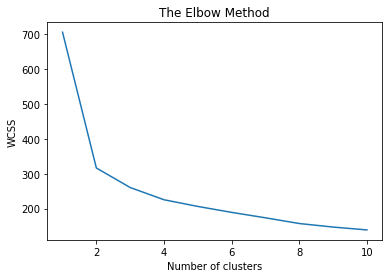

In [15]:
# Используя метод "локтя" посмотрим сколько же нужно выделить класеров для дальнейшего исследования. Как видим наибольшее падение начинается от двух кластеров и также от 4-х кластеров. Для того что бы определиться сколько выбрать кластеров используем метод силуэта. 
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

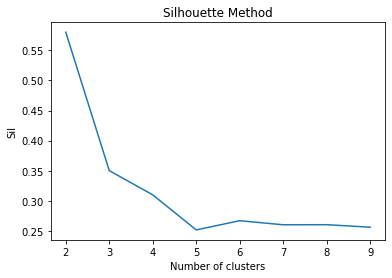

2:0.5799222431082719
3:0.35023094560835955
4:0.31005608678901037
5:0.2518729317295965
6:0.2671645712110648
7:0.26039382057054444
8:0.26053417609588336
9:0.2563996447160937


In [16]:
# Применяем метод силуэта от 2 до 10 кластеров. МЫ стремимся найти максимум и как видим на 2-х кластерах значение = 0,579.Будем использовать 2 кластера.
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 10), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [17]:
# Используем метод К средних и выведем ядра кластеров.. 
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 2, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['totsp','livesp','kitsp','dist','metrdist','floor','price']).round()

,totsp,livesp,kitsp,dist,metrdist,floor,price
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,-0.0


In [18]:
# выделим 4 переменные
X = df[:, [1,3,4,6]]

In [19]:
# Построим функции на 2-х кластерах и выведем ядра кластеров. 
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['livesp','dist','metrdist','price']).round()

,livesp,dist,metrdist,price
0,0.0,1.0,1.0,-0.0
1,1.0,0.0,1.0,1.0


In [20]:
#Сравним резльтаты по иерархической кластеризации и метода К средних
import pickle
obj = {'km': km}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 4)
output.close()

In [21]:
# Прошкалируем данные. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(df)
df = sc.transform(df)

In [22]:
X = df[:, [1,3,4,6]]

In [23]:
pip install SimpSOM

Note: you may need to restart the kernel to use updated packages.


In [24]:
#Обучим модель на 10000 случаях.
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(20, 30, X, PBC=True)
net.train(0.01, 10000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


In [25]:
df

array([[-1.1216408 , -0.8582623 , -1.21265519, ..., -0.02347072,
         3.73409126, -0.51908205],
       [-2.58078313, -3.13890466, -1.21265519, ..., -0.02347072,
         0.28996504, -0.51908205],
       [-0.12836797, -0.5462894 , -1.21265519, ..., -1.52130774,
         2.44254393, -0.51908205],
       ...,
       [-0.94257624,  0.03540016, -1.84304724, ..., -0.61827993,
        -0.14055074, -0.51908205],
       [ 0.30600533,  0.30753382,  0.55356718, ..., -0.61827993,
        -0.14055074, -0.51908205],
       [-0.60169031, -0.10513684, -0.67966631, ..., -0.61827993,
        -0.14055074, -0.51908205]])

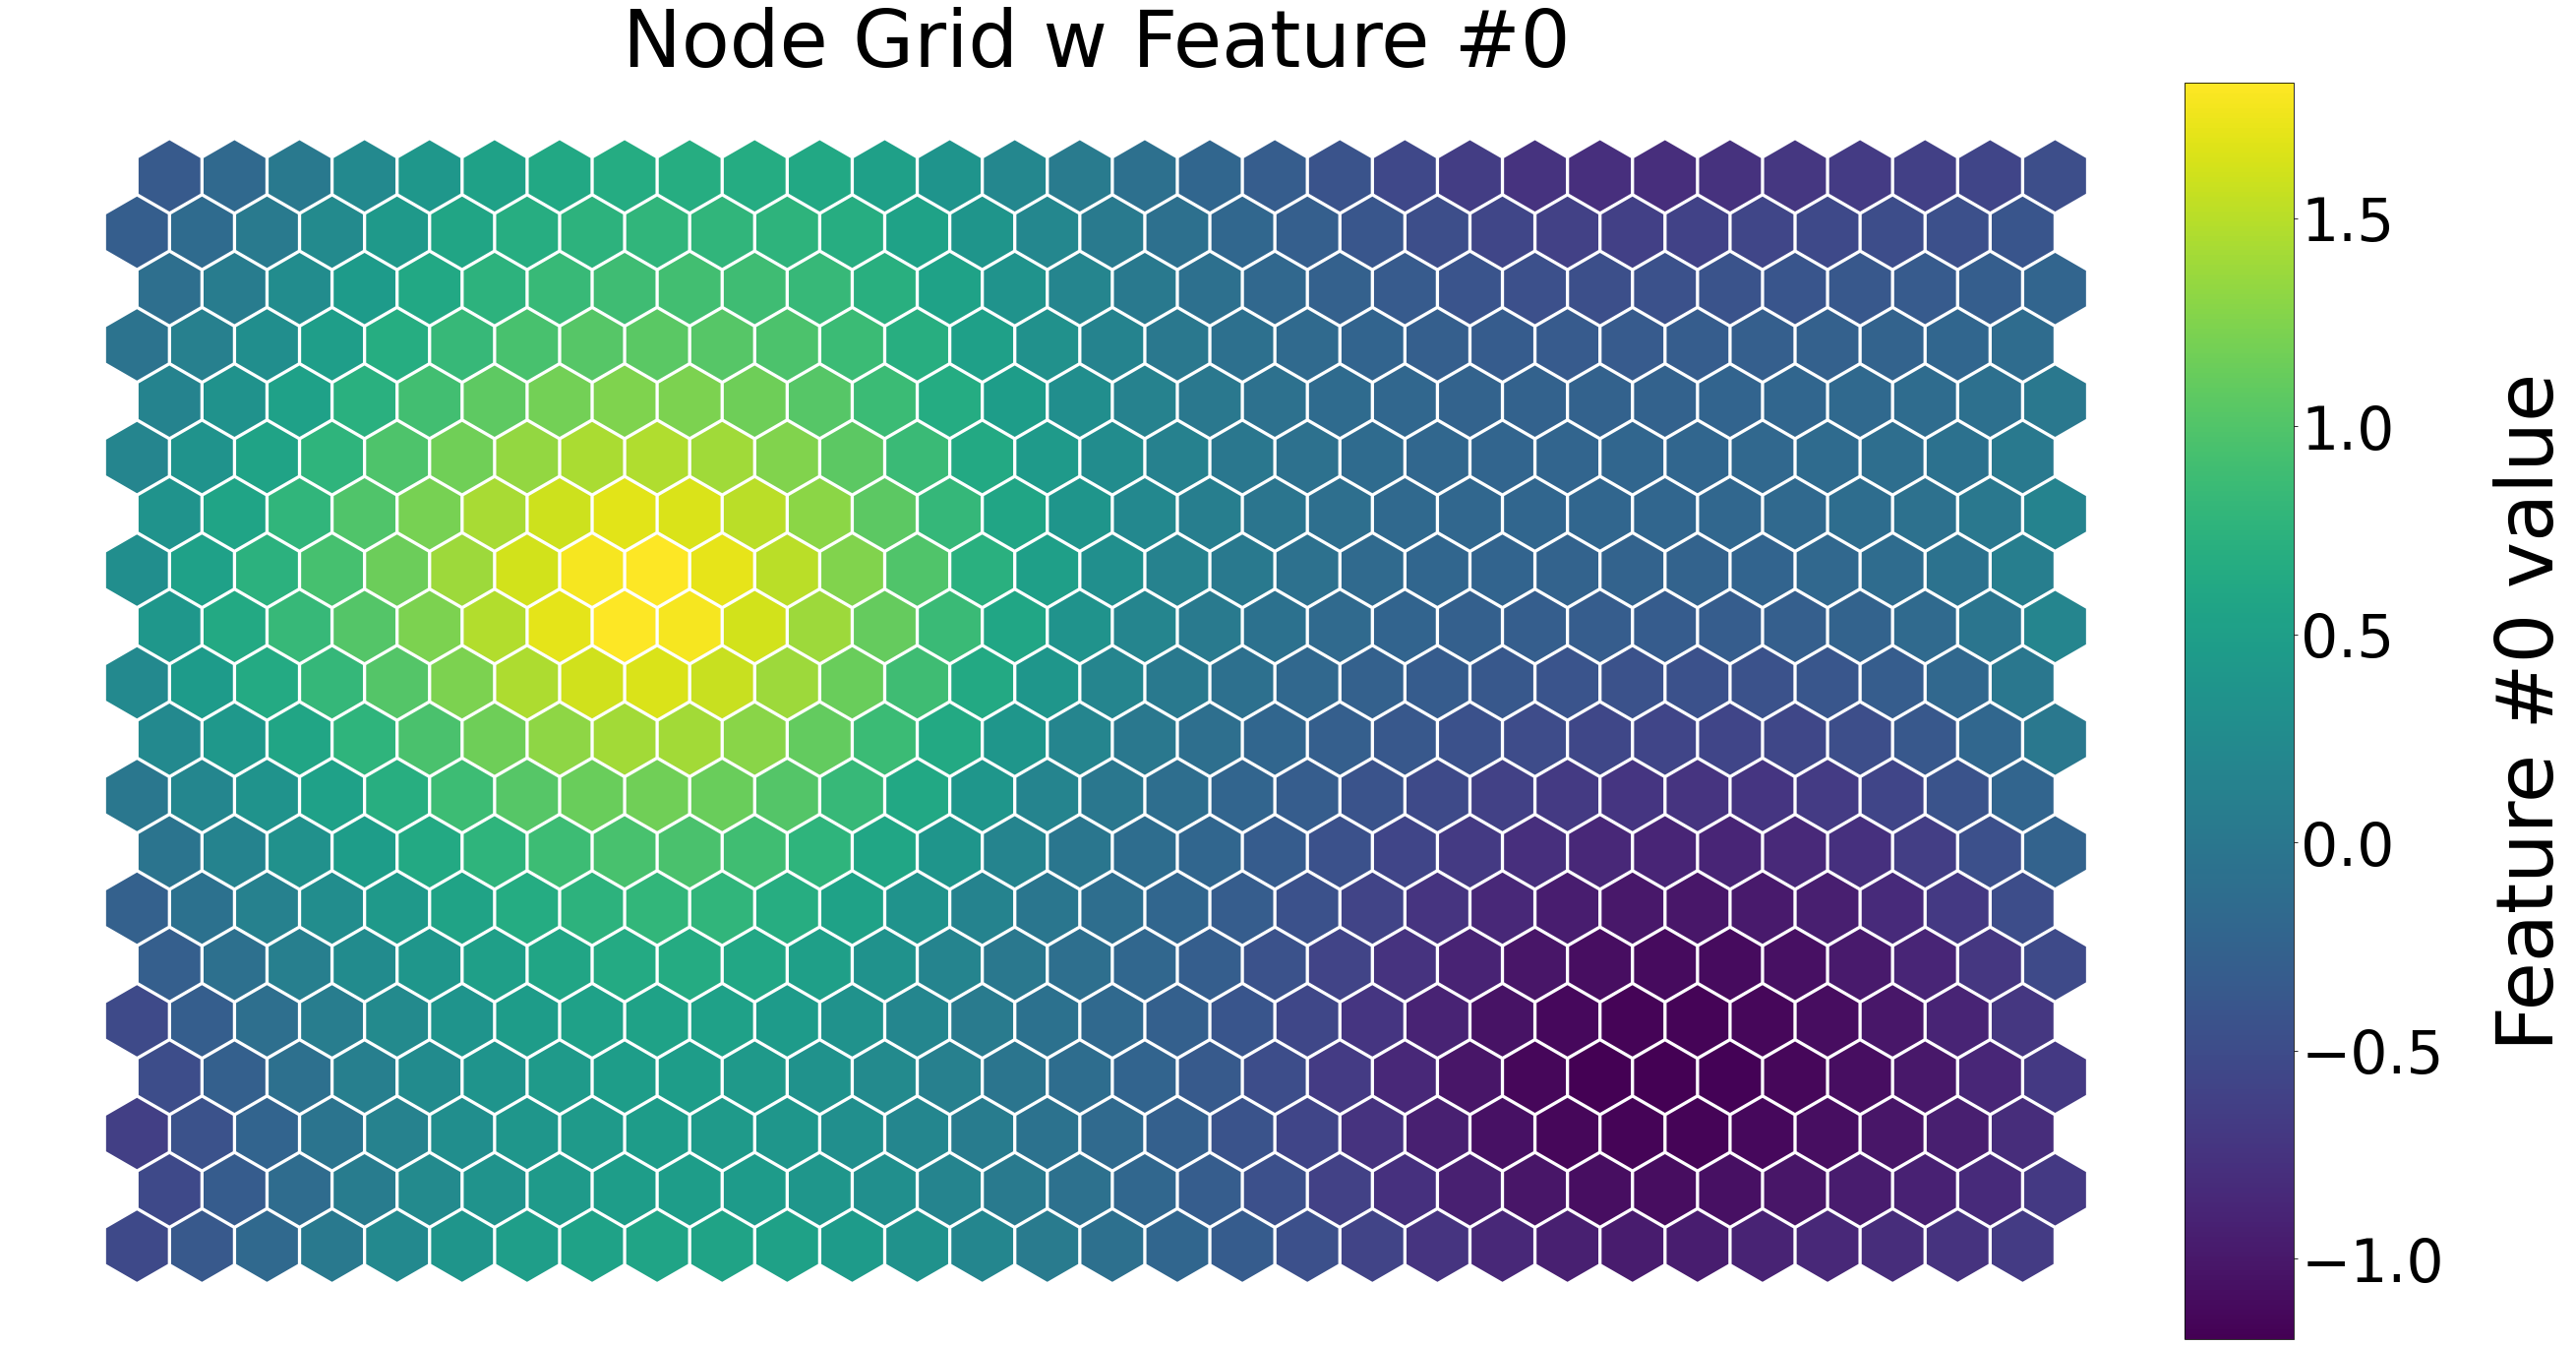

In [26]:
net.nodes_graph(colnum=0)

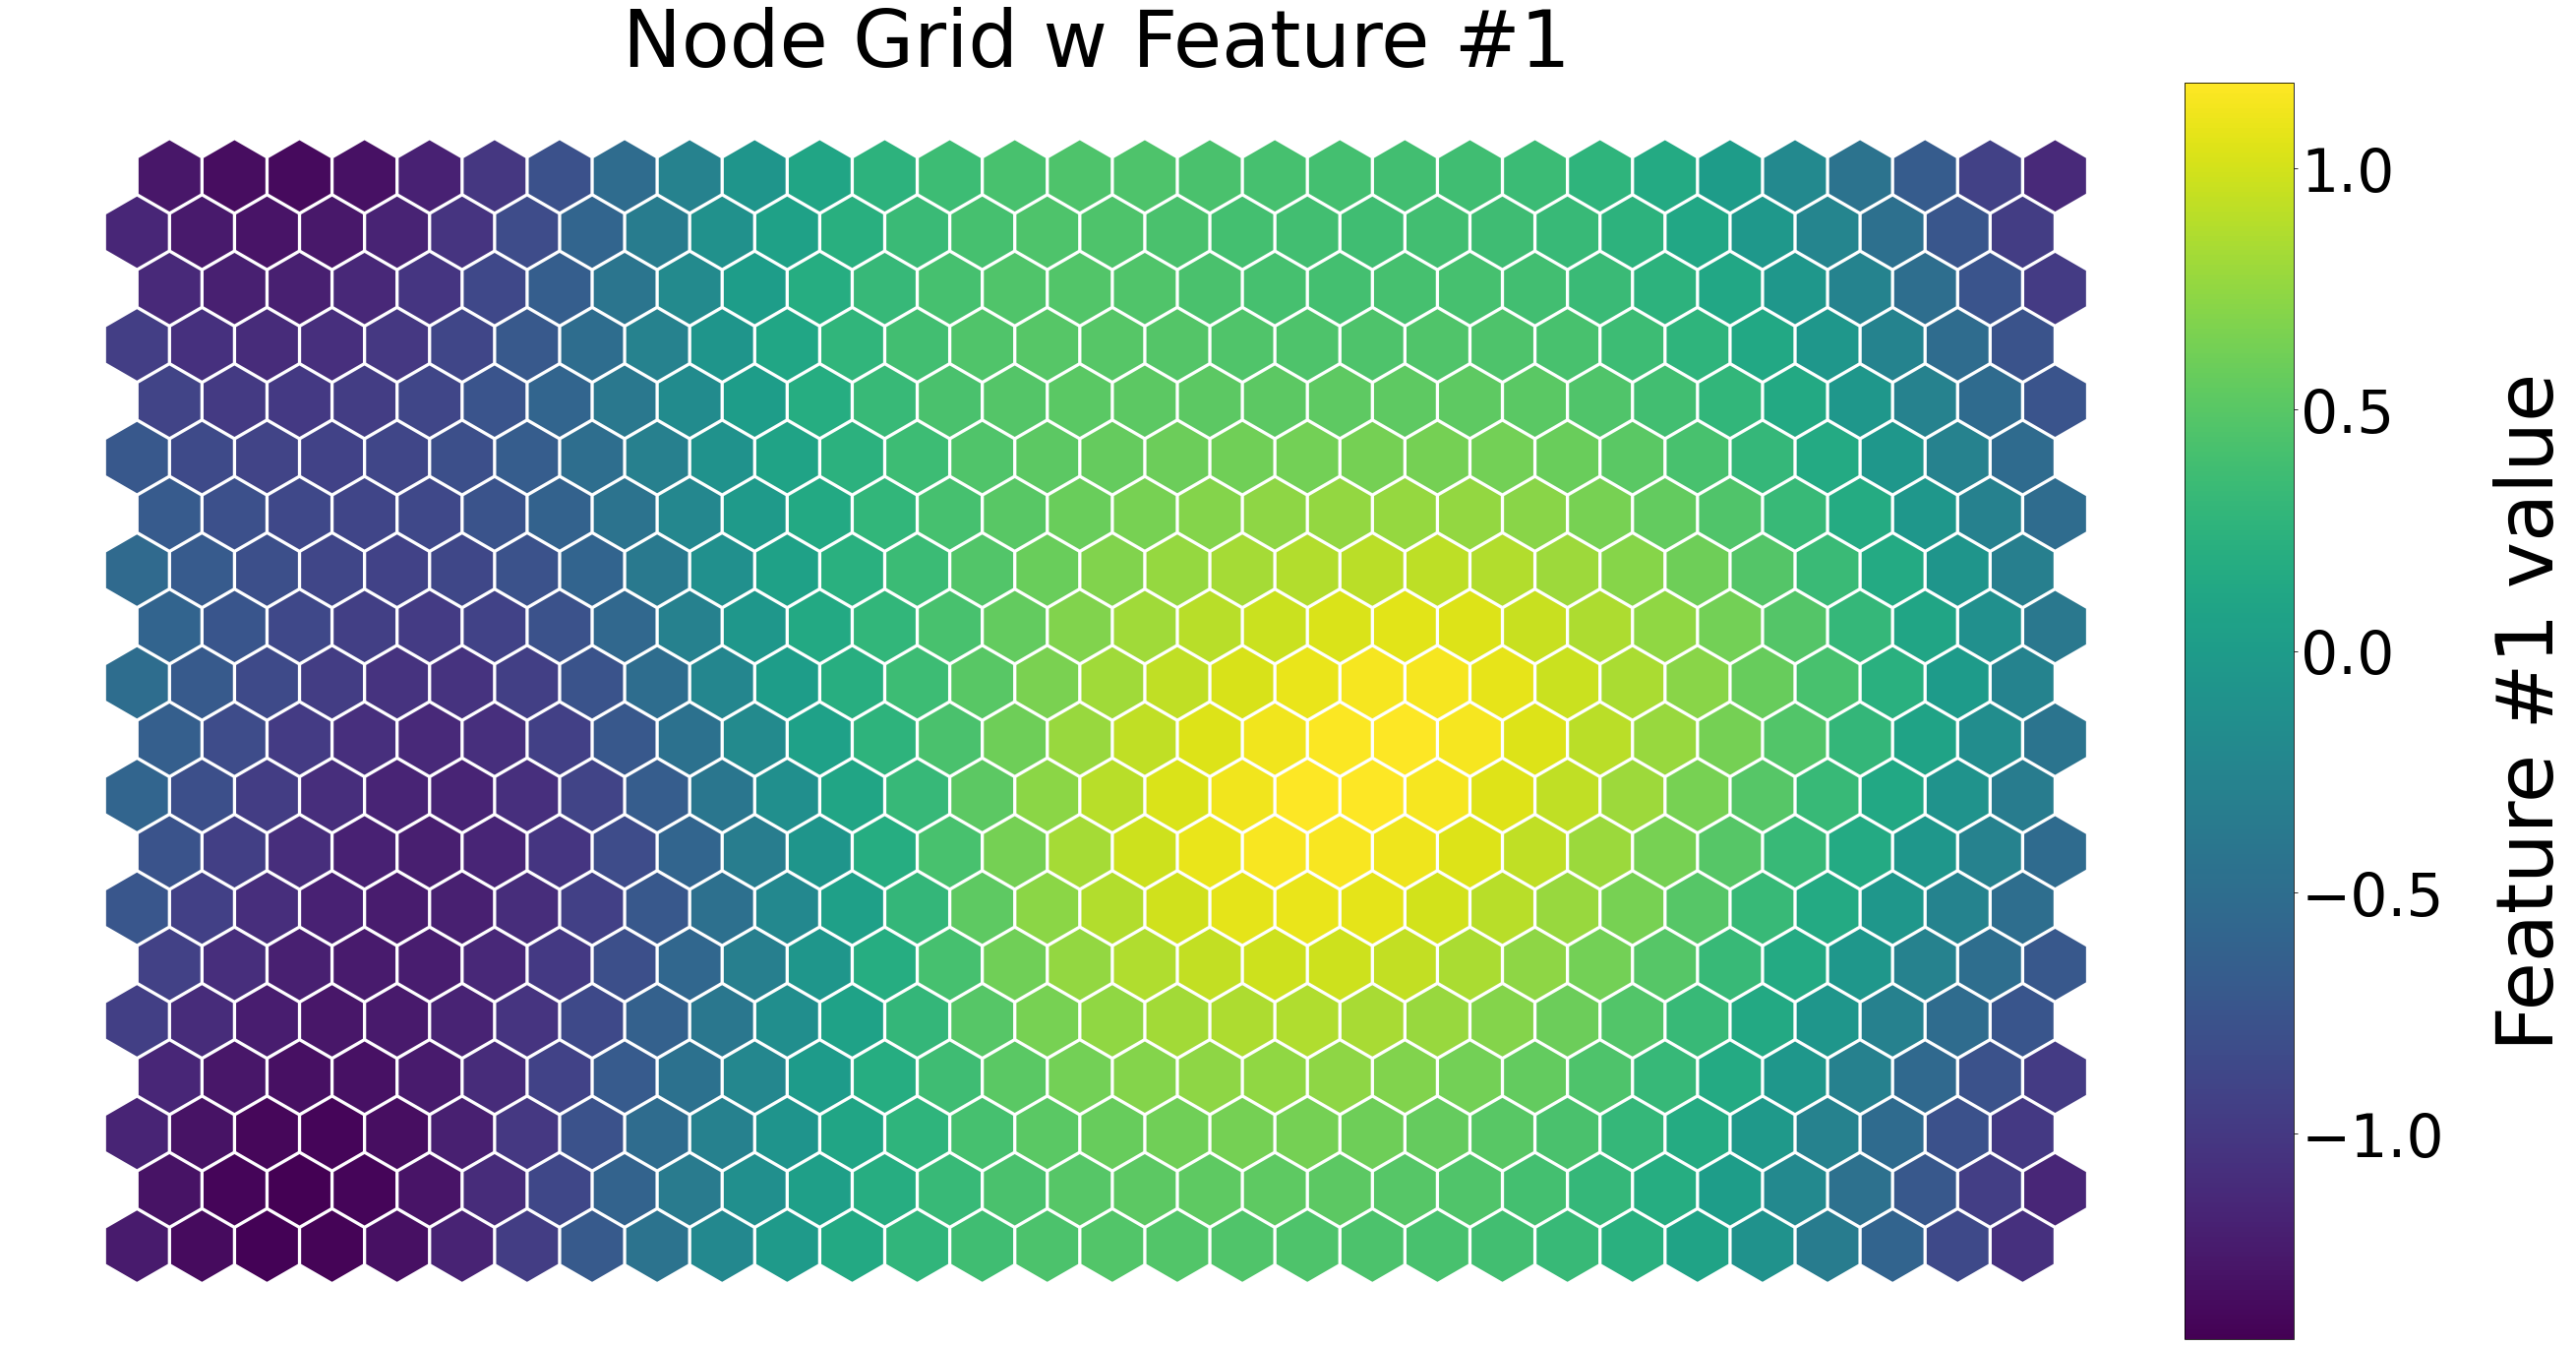

In [27]:
net.nodes_graph(colnum=1)

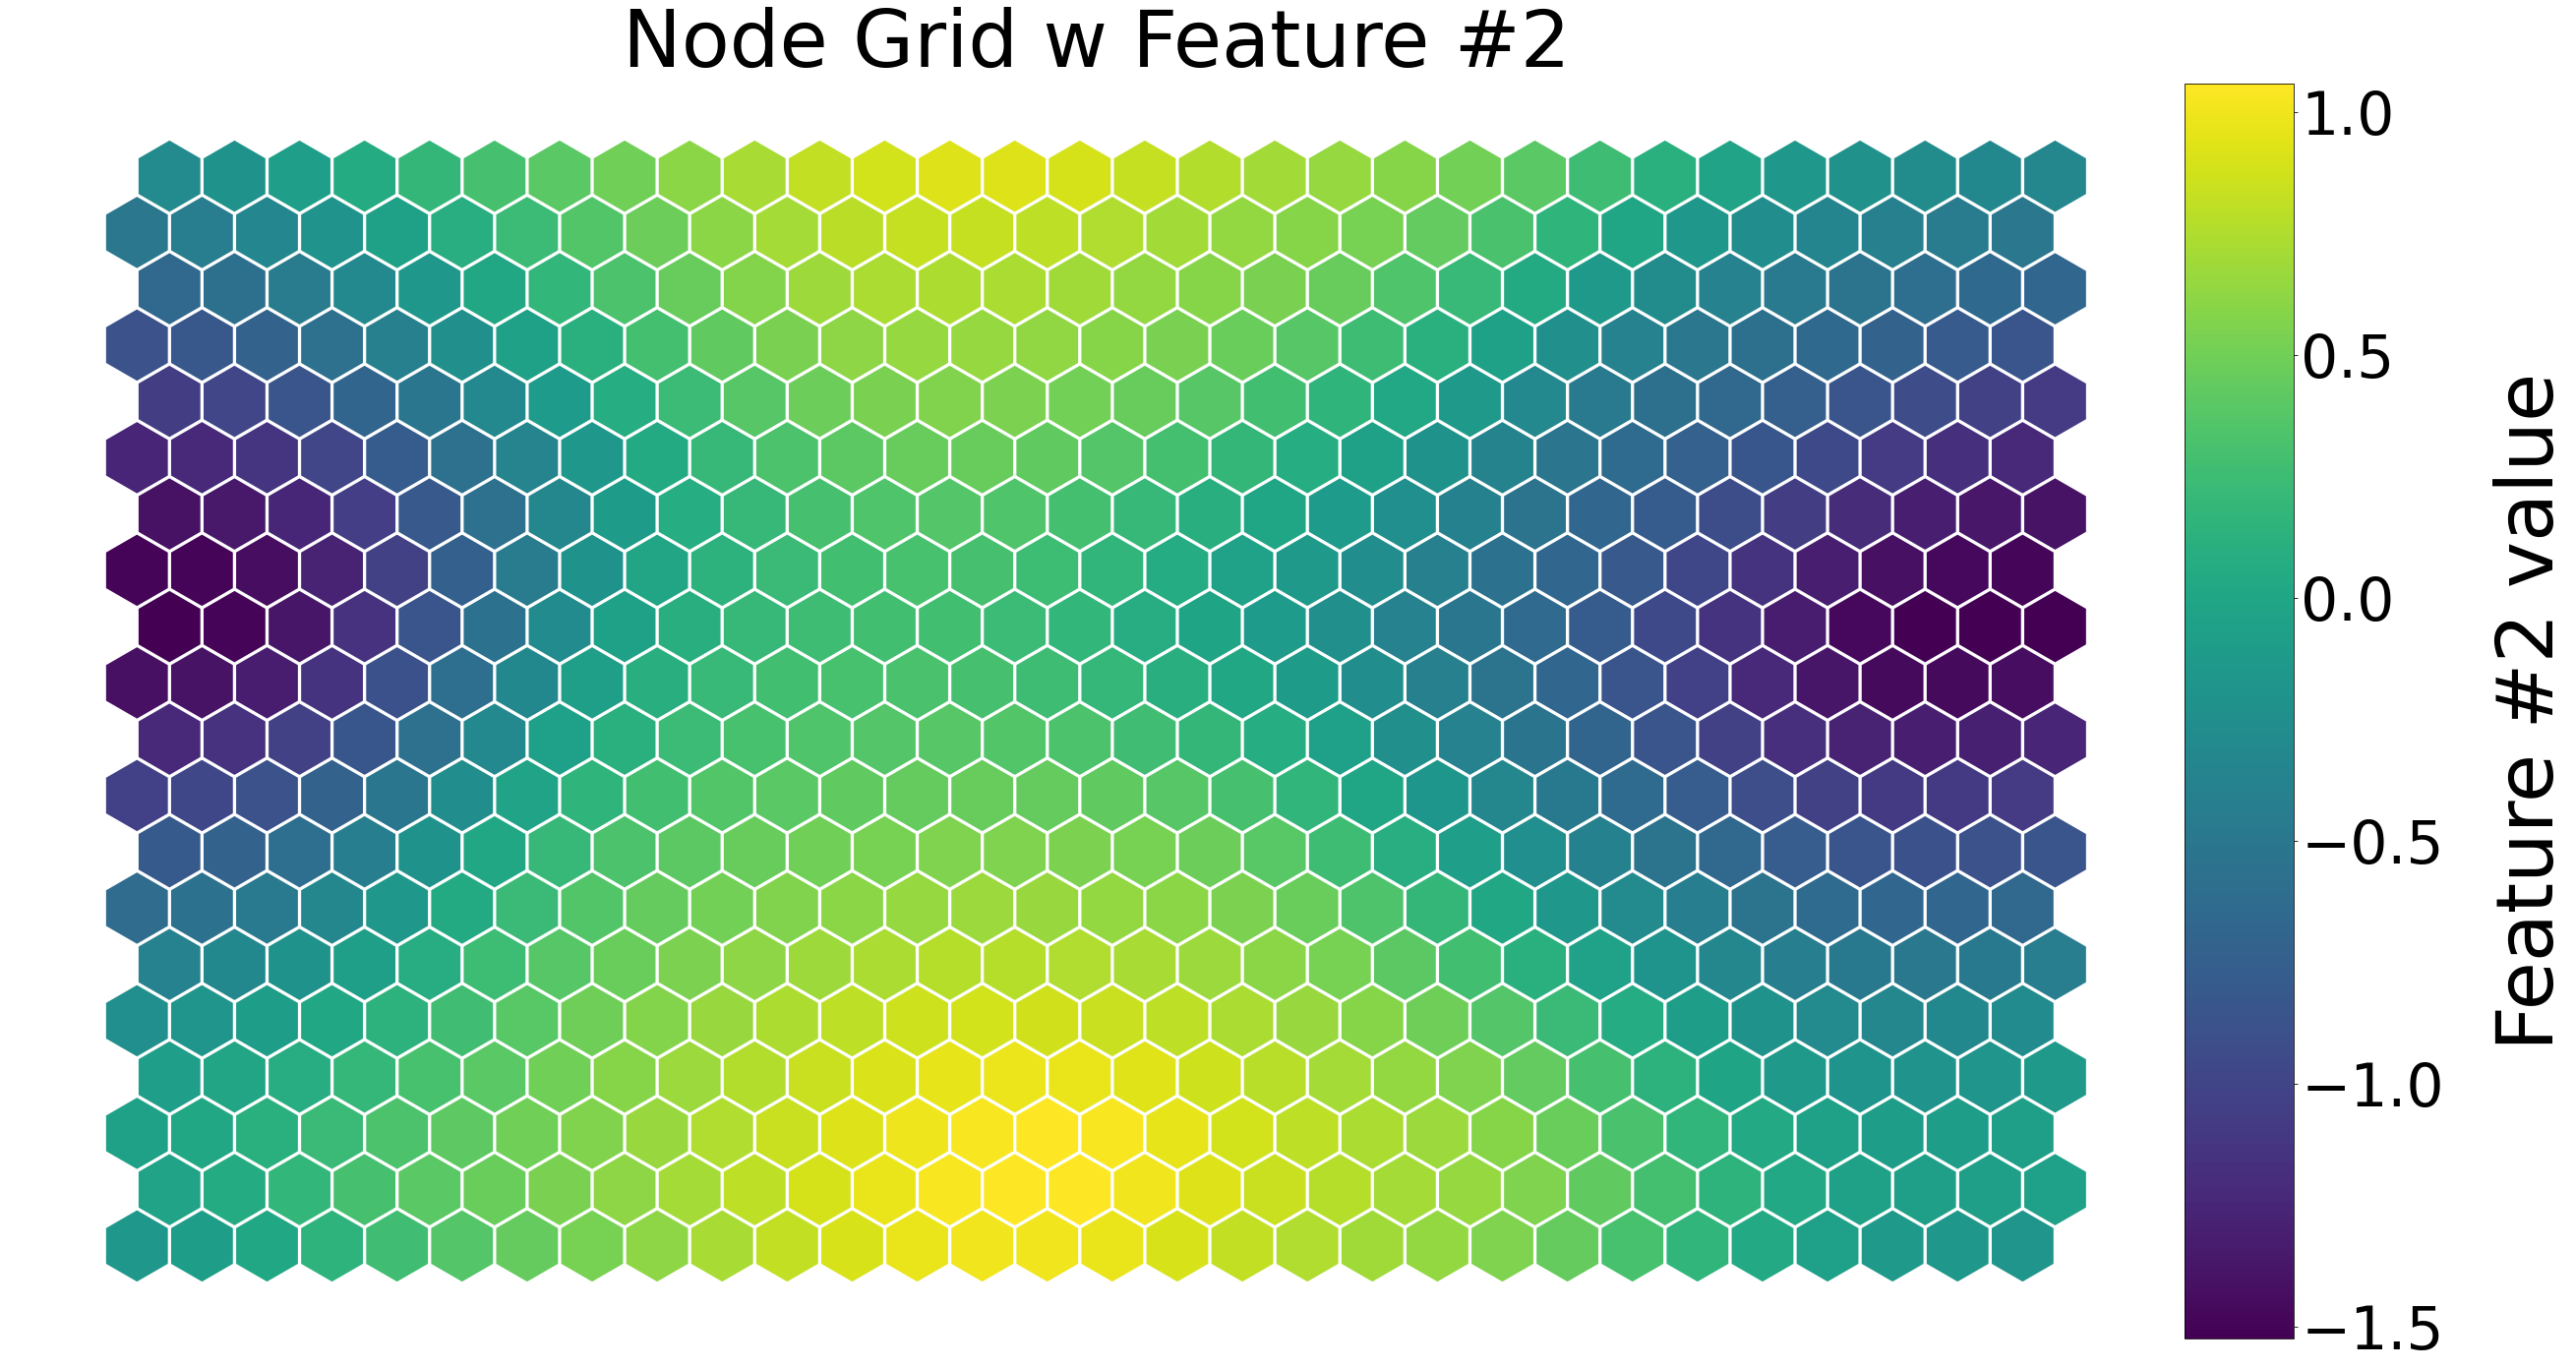

In [28]:
net.nodes_graph(colnum=2)

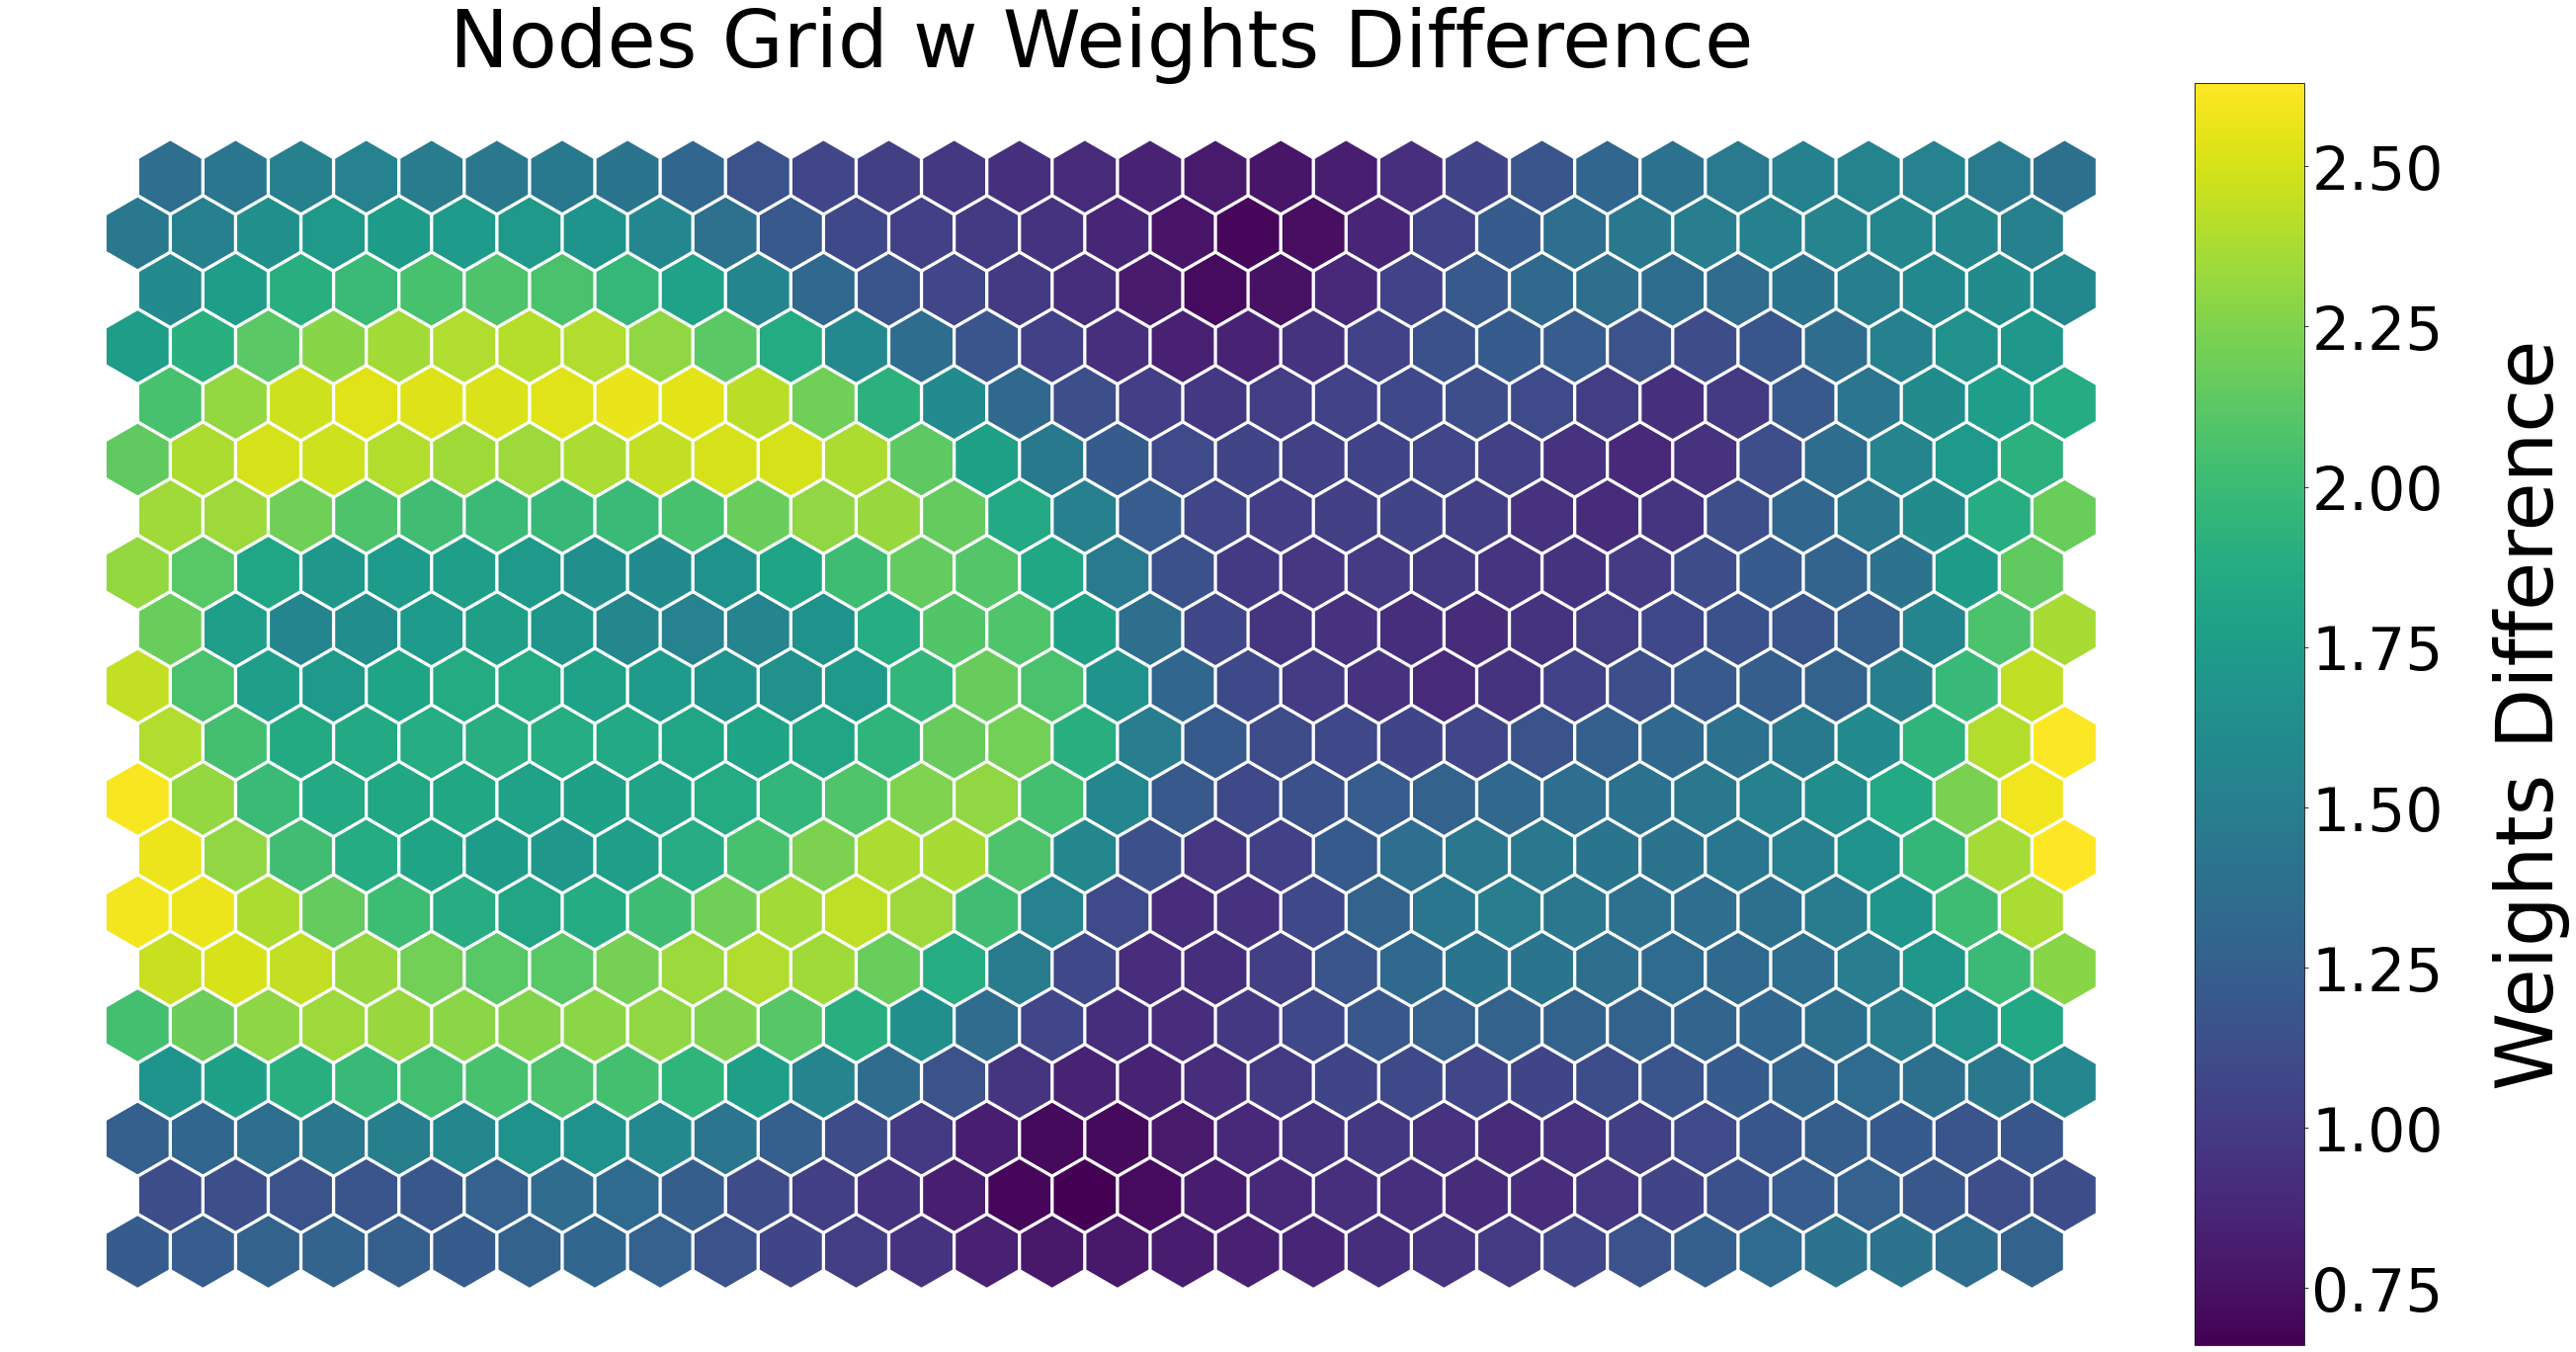

In [29]:
net.diff_graph()

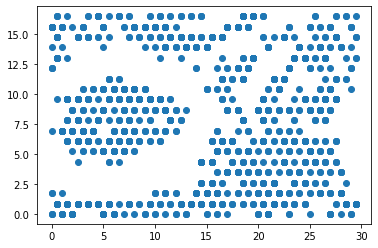

In [30]:
#Получаем 2 кластера которые можно охарактеризовать следующим образом:  Исходя из этого можно сделать вывод что квартиры с жилой площадью меньше чем 60 кв.м., с расстоянием до центра города больше 10км временем до ближайшего метро выше чем 5-6 минут считаются дешевыми и наоборот.  
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [31]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(prj)

In [32]:
# Importing km clusters
import pickle
input = open('clust-km.pkl', 'rb')
obj = pickle.load(input)
input.close()
km = obj["km"]

In [33]:
# Как видим из резльтатов кластеризации 36% пациентов (людей) были определены верно. 
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

0.36556589815229384

In [34]:
#Вывод: Была проделана работа по кластеризации с помощью метода К средних. Быд загружен исходный датасет и преобразован для дальнейшей работы (заполнены пропуски, данные были прологарифмированы,избавились от выбросов). Далее было опредеелно с помощью метода локтя и силуэта что лучше всего брать 2 кластера. Из шкалированных данных были выбраны 4 переменные (Общая жилая площадь, расстояние до центра и время до метро, цена).Далее были построены 2 кластера. Для того что бы определить на сколько точна модель мы сравнием ее и иерархческой кластеризаций обучивши модель на 10000. Как видно дальще 36% случаев пересекаются. Точность модели не удовлетворительная и ее лучше не  использовать для дальнейшей работы.   